# アルゴリズムで利用する関数作成

In [1]:
# 遺伝子の作成
def generate_gene(x, y):
    gene = []
    for i in range(len(x)):
        gene.append((x.values[i], y.values[i]))
    return gene

In [2]:
# 評価関数の作成
def reputate(genes_sample):
    f = []
    for i in range(m):
        x = []
        y = []
        d = []
        for j in range(n):
            x.append(genes_sample[i][j][0])
            y.append(genes_sample[i][j][1])
        for k in range(n-1):
            d.append(np.sqrt((x[k] - x[k+1]) ** 2 + (y[k] - y[k+1]) ** 2))
        f.append(np.array(d).sum())
    return f

In [3]:
# 子の作成
def generate_child(parent1_ori, parent2_ori):
    while True:
        generated_gene = parent1_ori.copy()
        parent1 = parent1_ori.copy()
        parent2 = parent2_ori.copy()
        list1 = []
        list2 = list(range(0, n))
        i = 0
        while True:
            a = randint(0, n-1)
            if not any(np.in1d(list1, a)):
                list1.append(a)
                list2.remove(list1[-1])
                i += 1
            if i == 3:
                break

        for j in list1:
            generated_gene[j] = parent1[j]
            parent2.remove(parent1[j])
        for (j, k) in zip(list2, range(0, len(parent2))):
            generated_gene[j] = parent2[k]

        if (generated_gene != parent1) and (generated_gene != parent2):
            break

    return generated_gene

In [4]:
# 突然変異（どこか2つの順番を入れ替える）
def mutation(gene):
    num1, num2 = randint(0, n-1), randint(0, n-1)
    tmp = gene[num1]
    gene[num1] = gene[num2]
    gene[num2] = tmp
    return gene

# プログラム

In [5]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from random import shuffle, randint, sample

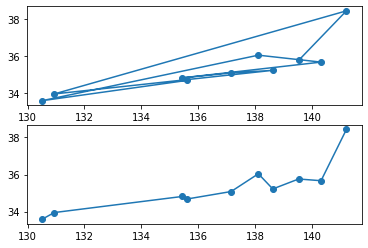

In [6]:
n = 10   # 都市数
m = 10   # 個体数
loop = 500   # ループ回数
generation = 1   # 世代
reputation_hist = []   # 評価値の保存

# データの読み込み
japan = pd.read_csv('jp.csv')
cities = japan.sample(n)
cities = cities[['city', 'lat', 'lng']]
cities.head()

x = cities['lng']
y = cities['lat']
plt.subplot(2, 1, 1)
plt.scatter(x, y)
plt.plot(x, y)

# 経路
gene_0 = generate_gene(x, y)

# ランダムな経路10通りの遺伝子を生成
genes = []
for _ in range(10):
    gene_0 = sample(gene_0, n)
    genes.append(gene_0)

for _ in range(0, loop):
    # 評価
    reputated_genes = reputate(genes)

    # データ準備
    d = {'gene1': [genes[0], reputated_genes[0]],
         'gene2': [genes[1], reputated_genes[1]],
        'gene3': [genes[2], reputated_genes[2]],
        'gene4': [genes[3], reputated_genes[3]],
        'gene5': [genes[4], reputated_genes[4]],
        'gene6': [genes[5], reputated_genes[5]],
        'gene7': [genes[6], reputated_genes[6]],
        'gene8': [genes[7], reputated_genes[7]],
        'gene9': [genes[8], reputated_genes[8]],
        'gene10': [genes[9], reputated_genes[9]]}

    df = pd.DataFrame(data=d, index=['gene', 'reputation'])
    df = df.T
    df = df.sort_values('reputation')
    
    # 評価値のリスト
    reputation_hist.append(df['reputation'][0])
    
    # 世代数のカウント
#     print(f'{generation}世代')
#     print(f'経路長：{reputation_hist[-1]}')
#     generation += 1

    # 評価値上位2つを選択し、新たな遺伝子に加える。ただし同じ配列のものは選ばない。
    genes = []
    genes.append(df['gene'][0])
    for i in range(len(df['gene'])):
        genes.append(df['gene'][i])
        if genes[0] == df['gene'][i]:
              genes.remove(genes[-1])
        else:
            break

    # 子を6つ作成し、新たな遺伝子に加える
    for _ in range(0, 3):
        genes.append(generate_child(genes[0], genes[1]))
        genes.append(generate_child(genes[1], genes[0]))
      
    # 突然変異
    genes.append(mutation(genes[0]))
    genes.append(mutation(genes[0]))
    
best_gene = df['gene'][0]
best_x = []
best_y = []
for i in range(0, len(best_gene)):
    best_x.append(best_gene[i][0])
    best_y.append(best_gene[i][1])
plt.subplot(2, 1, 2)
plt.scatter(best_x, best_y)
plt.plot(best_x, best_y)
plt.show()

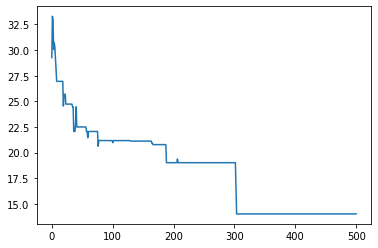

In [7]:
# 評価関数の推移
plt.plot(np.linspace(0, loop, loop), reputation_hist)